In [50]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/10.6 MB ? eta -:--:--
                                              0.1/10.6 MB 3.3 MB/s eta 0:00:04
     -                                        0.5/10.6 MB 6.3 MB/s eta 0:00:02
     ----                                     1.1/10.6 MB 7.6 MB/s eta 0:00:02
     -----                                    1.5/10.6 MB 8.8 MB/s eta 0:00:02
     -------                                  2.0/10.6 MB 8.4 MB/s eta 0:00:02
     --------                                 2.4/10.6 MB 8.5 MB/s eta 0:00:01
     ----------                               2.8/10.6 MB 9.0 MB/s eta 0:00:01
     ------------                             3.2/10.6 MB 8.6 MB/s eta 0:00:01
     -------------                            3.7/10.6 MB 9.1 MB/s eta 0:00:01
     ---------------                          4.1/10.6 MB 8.8 MB/s eta 0:00:01
     -----------------                        4.6/10.6 MB 8.

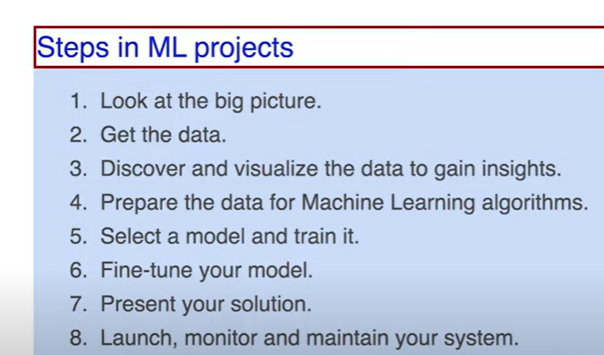

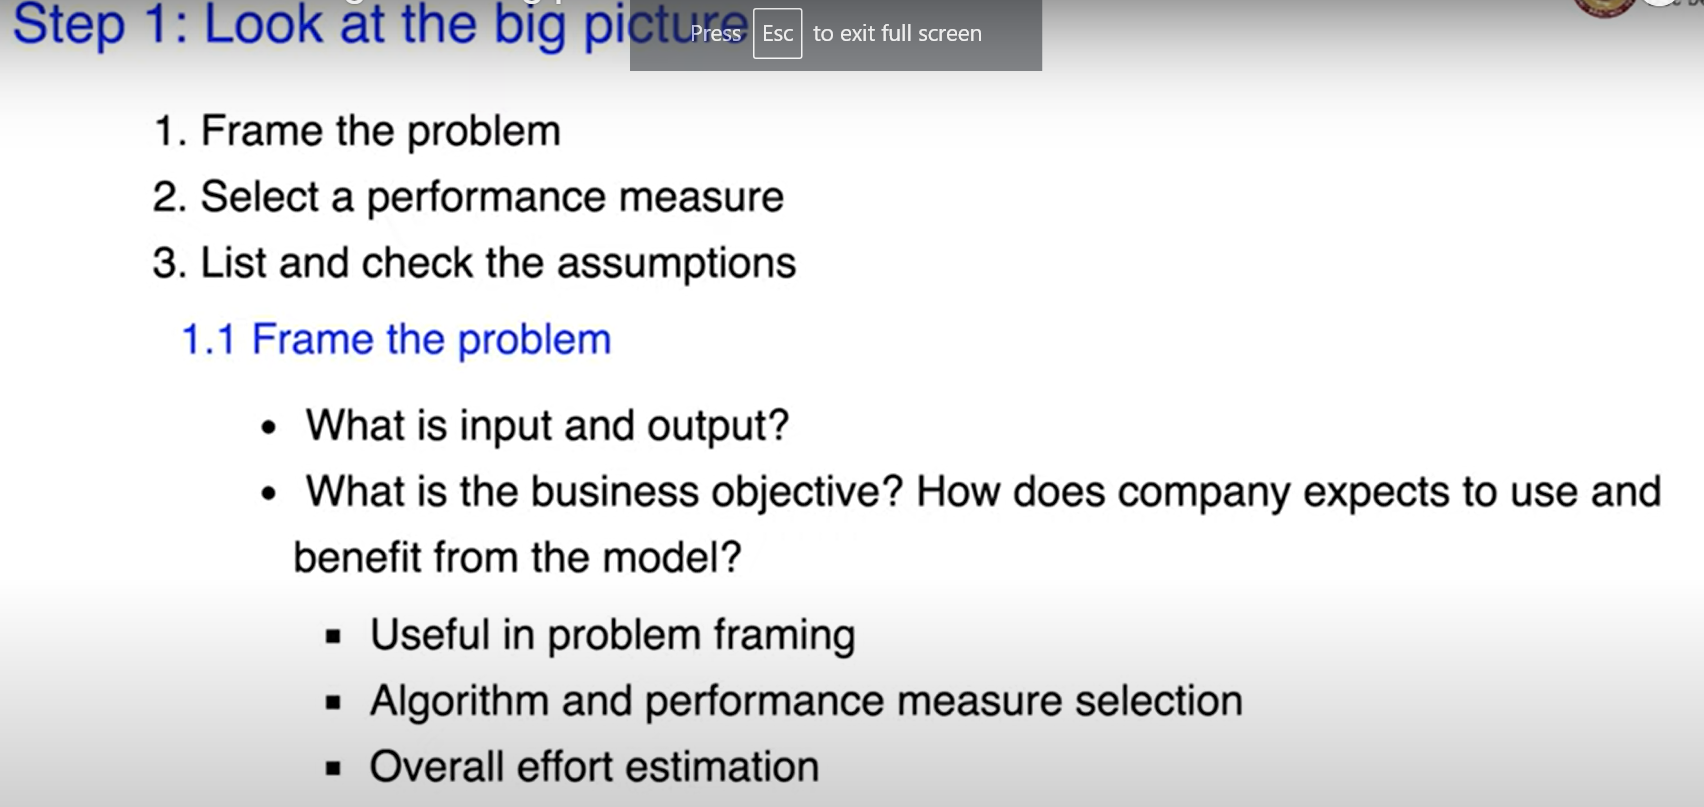



In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [4]:
# reading file using pandas
data=pd.read_csv("winequality-red.csv",sep=";")

In [5]:
data.head()
# output is quality 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# reading the feature of data using names file 
f=open("winequality.names","r")
s=f.read()
print(s)
f.close()

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [7]:
# defining input and output 
features_list=data.columns[:-1]
label=data.columns[-1]


In [9]:
#getting info for data  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
# checking for label data statistics 
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'count')

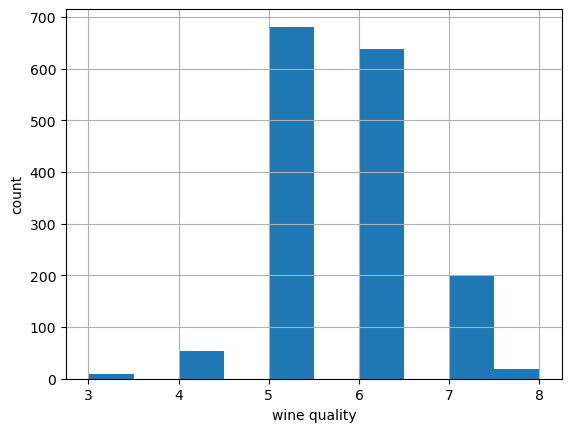

In [12]:
#sns.set() # used for set asthetic like colour, grid e.t.c as defult of seaborn 
data.quality.hist()
plt.xlabel("wine quality")
plt.ylabel("count")

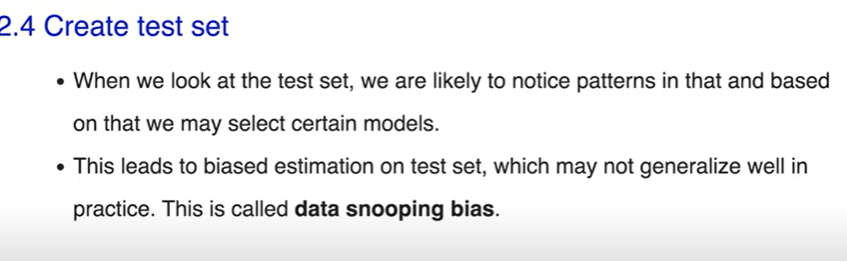

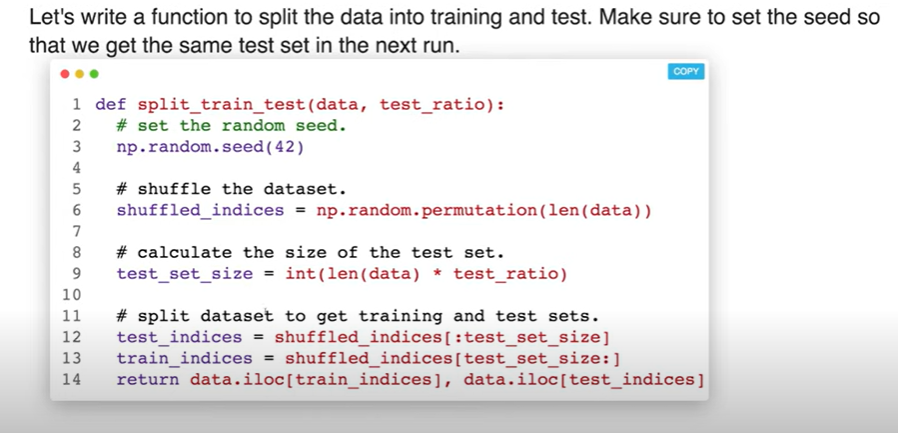

In [13]:
def split_train_test(d,ratio):
    np.random.seed(42)# use for fix data choosing randomly 
    
    shuffled_indices=np.random.permutation(len(d))
    
    test_set_size=int(len(d)*ratio)
    
    test_indices=shuffled_indices[:test_set_size]
    
    train_indices=shuffled_indices[test_set_size:]
    
    return d.iloc[train_indices],d.iloc[test_indices]


In [14]:
train_data,test_data=split_train_test(data,.2)

In [15]:
train_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
704,9.1,0.765,0.04,1.6,0.078,4.0,14.0,0.99800,3.29,0.54,9.7,4
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4,6
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7


In [16]:
test_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
485,10.2,0.67,0.39,1.90,0.054,6.0,17.0,0.99760,3.17,0.47,10.0,5
1259,6.8,0.64,0.00,2.70,0.123,15.0,33.0,0.99538,3.44,0.63,11.3,6
1295,6.6,0.63,0.00,4.30,0.093,51.0,77.5,0.99558,3.20,0.45,9.5,5
1155,8.3,0.60,0.25,2.20,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,5


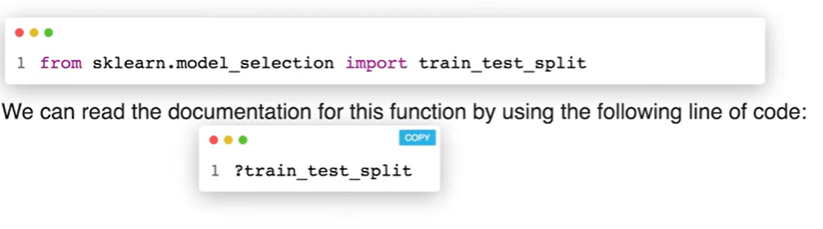

## Stratified sampling 
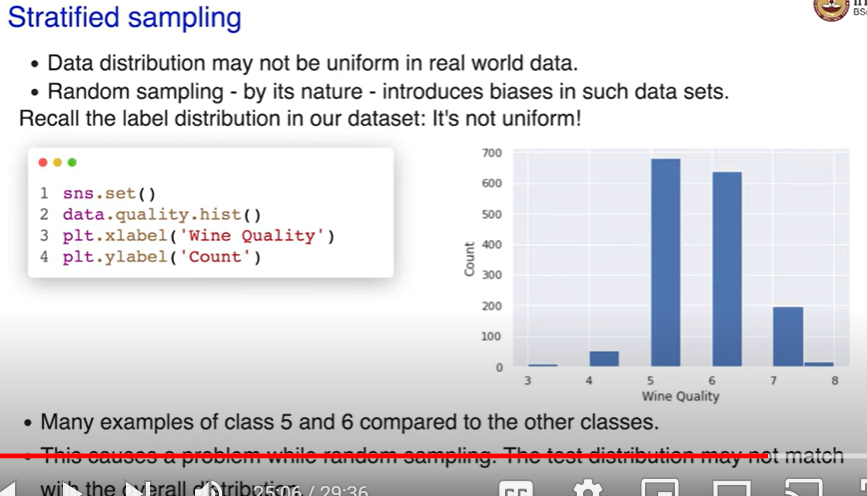

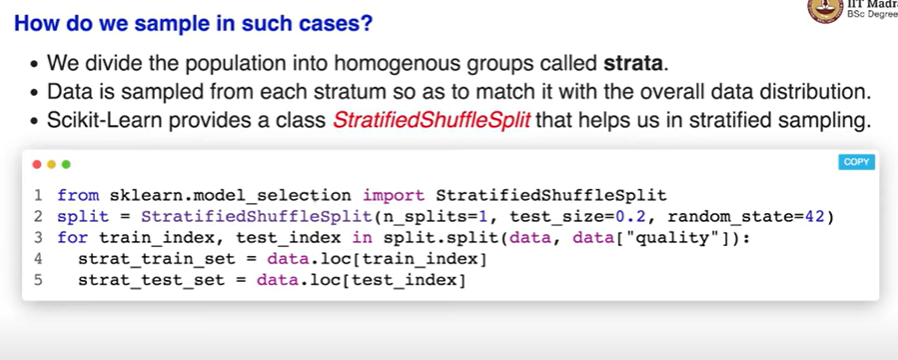

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42)
for train_index,test_index in split.split(data,data["quality"]):
    start_train_set=data.loc[train_index]
    start_test_set=data.loc[test_index]

In [22]:
 start_train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1542,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6
1558,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70,6
924,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20,5
971,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1056,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10,7
1394,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20,5
337,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30,5
539,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20,5


In [23]:
 start_test_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
963,8.8,0.27,0.39,2.0,0.100,20.0,27.0,0.99546,3.15,0.69,11.2,6
475,9.6,0.68,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
329,10.7,0.46,0.39,2.0,0.061,7.0,15.0,0.99810,3.18,0.62,9.5,5
149,8.2,0.40,0.44,2.8,0.089,11.0,43.0,0.99750,3.53,0.61,10.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1173,7.6,0.36,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,6
827,7.1,0.46,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,5
356,11.5,0.41,0.52,3.0,0.080,29.0,55.0,1.00010,3.26,0.88,11.0,5
1287,8.0,0.60,0.08,2.6,0.056,3.0,7.0,0.99286,3.22,0.37,13.0,5


## Data Visualization
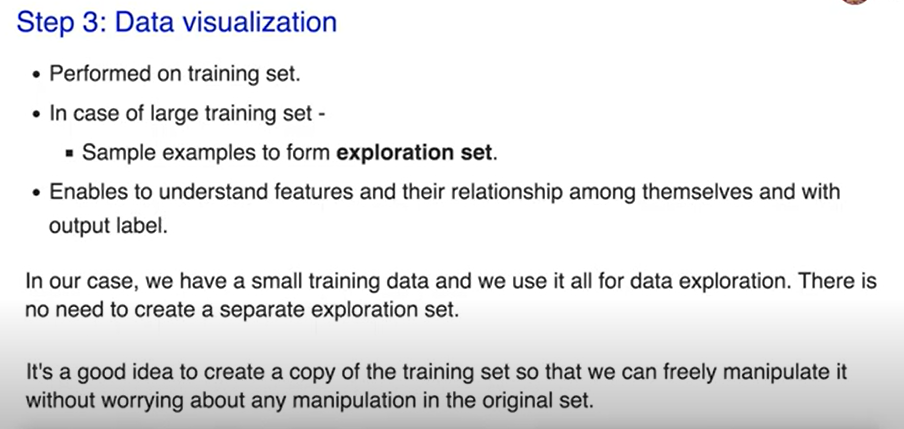

In [24]:
expolation_set=start_train_set.copy()

<Axes: xlabel='fixed acidity', ylabel='density'>

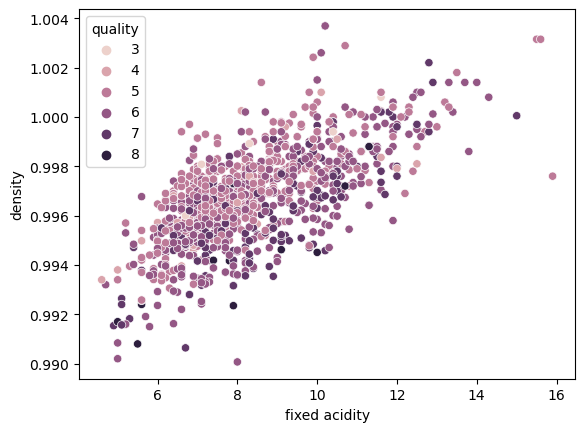

In [25]:
# scatter plot with seaborn
sns.scatterplot(x="fixed acidity",y="density",hue="quality",data=expolation_set)

### Scatterplot with matplotlib
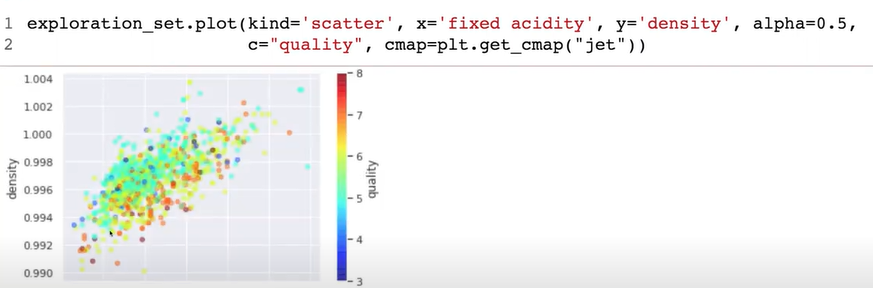


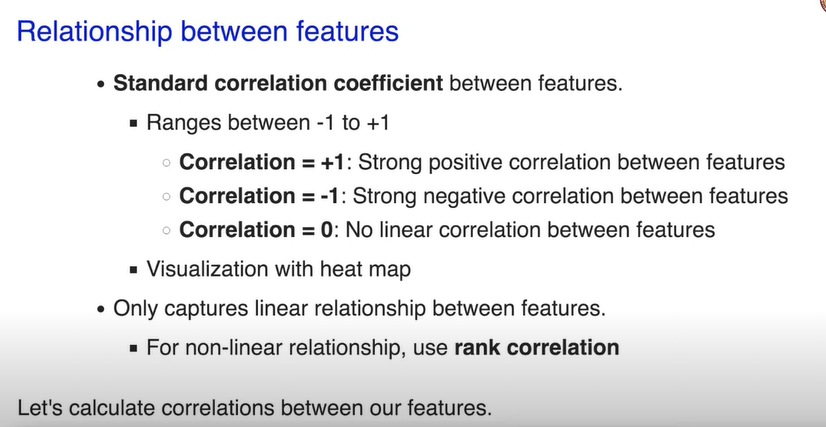

In [26]:
#this correlation is same correlation between variable  
matrix=expolation_set.corr()

In [28]:
matrix['quality']
# negative shows inverse and positive is direct 

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

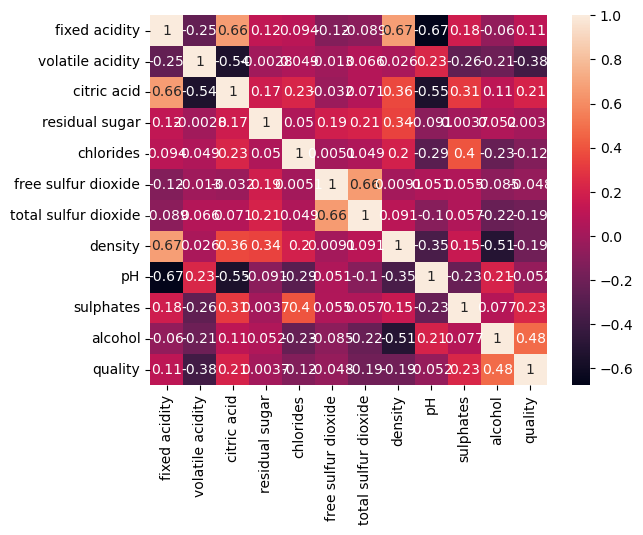

In [30]:
# this can be drawn by heatmap 
sns.heatmap(matrix,annot=True)

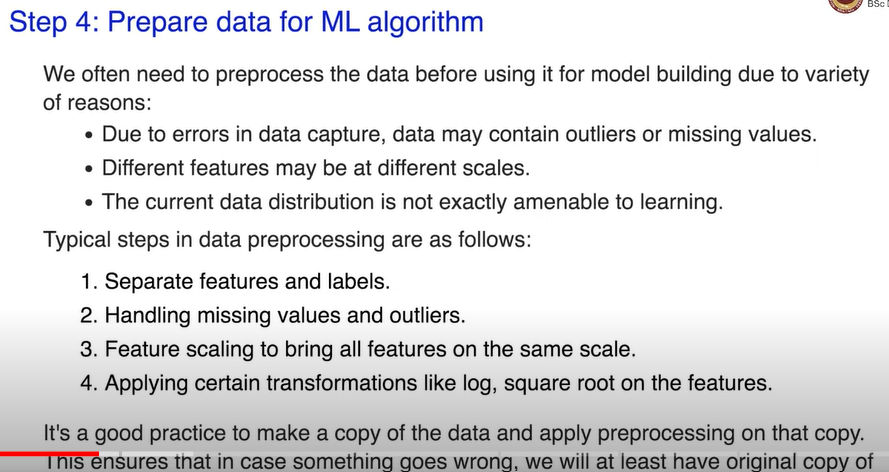

In [34]:
wine_feature=start_train_set.drop("quality",axis=1)
wine_label=start_train_set["quality"].copy()

In [35]:
wine_feature

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1542,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1558,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
924,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
971,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
...,...,...,...,...,...,...,...,...,...,...,...
1056,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10
1394,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20
337,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30
539,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20


In [36]:
wine_label

1542    6
1558    5
344     6
924     5
971     6
       ..
1056    7
1394    5
337     5
539     5
1083    6
Name: quality, Length: 1279, dtype: int64

In [37]:
#checking for missing values 
wine_feature.isna().sum()
# no missing value here

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [38]:
wine_label.isna().sum()

0

### ways to deal with missing values 
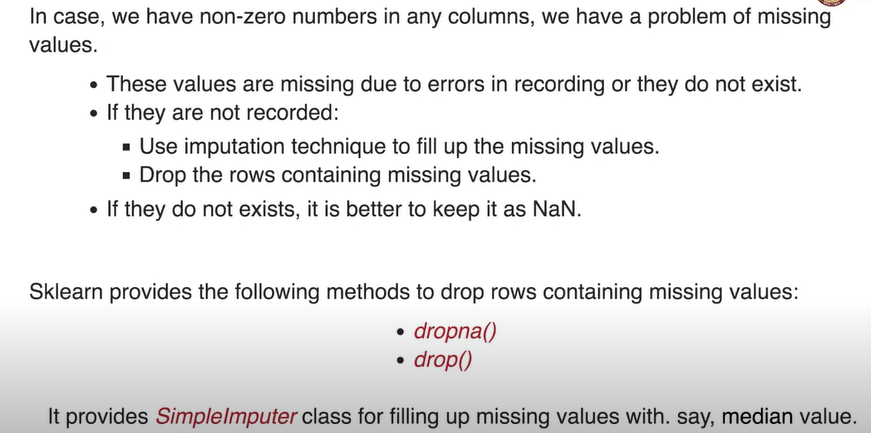